In [466]:
import tsplib95
import numpy as np
import matplotlib.pyplot as plt 
import random as rd
def podzialInt (linia):
    tab2=np.array                   #miejsce na linie na tabelke
    tab=[]
    #print(linia)
    for i in linia.split(" "):      #podzial
       try:
           tab.append(int(i))
       except ValueError:
            try:
                tab.append(float(i))
            except ValueError:
                return False
    tab2=tab

    return tab2
def WczytajProblem(sciezkaDoPliku):
    import tsplib95
    import numpy as np
    problem=tsplib95.load_problem(sciezkaDoPliku)
    lista=list(problem.get_edges())
    #problem.wfunc(1,2)
    tab=[]
    for x,y in lista:
        tab.append(problem.wfunc(x,y))
    tab2=np.array(tab)
    return tab2.reshape(x,y)

def ZnajdzNajblizszyPunkt(odleglosci,startMiasto):
    najblizszaOdleglosc=0
    for i,v in enumerate(odleglosci[startMiasto,:]):
        if najblizszaOdleglosc==0 and v>0:
            najblizszaOdleglosc=v
        if najblizszaOdleglosc>v and v>0:
            najblizszaOdleglosc=v
            najblizszyNumer=i
    return najblizszyNumer

def ObliczLacznyKoszt(macierzOdleglosci, sciezkaRuchu):
    kosztLaczny=macierzOdleglosci[sciezkaRuchu[0],sciezkaRuchu[-1]]
    for i in range (len(sciezka)-1):
        kosztLaczny+=macierzOdleglosci[sciezkaRuchu[i],sciezkaRuchu[i+1]]
    return kosztLaczny

def RysujWykres(sciezkaDoPliku,sciezkaRuchu,kosztLaczny,startMiasto,opis):
    import pylab
    import matplotlib
    import matplotlib.pyplot as plt
    #Wykres
    f=open(sciezkaDoPliku,"r")
    tab=[]
    for linia in f:
        if podzialInt(linia)!=False:
            tab.append(podzialInt(linia))
    tab=np.array(tab)
    tab2=[]
    
    pylab.plot(tab[:,1],tab[:,2],'ko')#wszystkie
    pylab.plot(tab[startMiasto,1],tab[startMiasto,2],'go')
    pylab.title(opis)
    for punkt in range(tab.shape[0]):
        pylab.annotate(tab[punkt,0]-1,xy=(tab[punkt,1]-80,tab[punkt,2]+50))
    for punkt in sciezkaRuchu:
        tab2.append(tab[punkt,:])
    tab2.append(tab[sciezka[0]])
    tab2=np.array(tab2)
    pylab.plot(tab2[:,1],tab2[:,2],'r')
    #pylab.plot(tab2[startMiasto,1],tab2[startMiasto,2],'g')
    #pylab.annotate("haha",xy=(2,2),xytext=(10,1000))
    pylab.show()
    print("Laczny koszt: ",kosztLaczny)
def sortSecond(val):
    return val[1]
class KosztyPunktu:
    def __init__(self,miasto):
        self.miasto=miasto
        self.punktWstawienia=[]
        self.kosztWstawienia=[]
        self.rozwiazania=[]
        self.zal=0
    def DodajRozwiazanie(self,punktWstawienia,kosztWstawieniaPunktu):
        self.punktWstawienia.append(punktWstawienia)
        self.kosztWstawienia.append(kosztWstawieniaPunktu)
    #def SortujRozwiazania(self)
    def sortSecond(val):
        return val[1]
    def Sortuj(self):       
        for i in range(len(self.punktWstawienia)):
            self.rozwiazania.append((self.kosztWstawienia[i],self.punktWstawienia[i]))
        self.rozwiazania.sort()#(key=sortsecond)
        #print(self.rozwiazania,self.miasto)
    def MinimalnaKrawedz(self):
        #print(self.rozwiazania[0],self.miasto)
        return (self.rozwiazania[0])
    def MiastoIndeks(self):
        return self.miasto
    def WyliczZal(self,zal):
        #print(self.rozwiazania[0][0])
        if zal<(len(rozwiazania)-1):
            self.zal=self.rozwiazania[0][0]-self.rozwiazania[zal][0]
        else:
            self.zal=self.rozwiazania[0][0]-self.rozwiazania[-1][0]  
    def PodajZal(self):
        return self.zal 
class Rozwiazanie():
    def __init__(self,sciezkaDoPliku,sciezkaRuchu,kosztLaczny,startMiasto,opis):
        self.sciezkaDoPliku=sciezkaDoPliku
        self.sciezkaRuchu=sciezka
        self.kosztLaczny=kosztLaczny
        self.kosztLaczny=kosztLaczny
        self.startMiasto=startMiasto
        self.opis=opis
    def Koszt(self):
        return self.kosztLaczny
    def Rysuj(self):
        import pylab
        import matplotlib
        import matplotlib.pyplot as plt
        
        #Wykres
        f=open(self.sciezkaDoPliku,"r")
        tab=[]
        for linia in f:
            if podzialInt(linia)!=False:
                tab.append(podzialInt(linia))
        tab=np.array(tab)
        tab2=[]
        
        pylab.plot(tab[:,1],tab[:,2],'ko')#wszystkie
        pylab.plot(tab[self.startMiasto,1],tab[self.startMiasto,2],'go')
        pylab.title(self.opis)
        for punkt in range(tab.shape[0]):
            pylab.annotate(tab[punkt,0]-1,xy=(tab[punkt,1]-80,tab[punkt,2]+50))
        for punkt in self.sciezkaRuchu:
            tab2.append(tab[punkt,:])
        tab2.append(tab[self.sciezkaRuchu[0]])
        tab2=np.array(tab2)
        pylab.plot(tab2[:,1],tab2[:,2],'r')
        #pylab.plot(tab2[startMiasto,1],tab2[startMiasto,2],'g')
        #pylab.annotate("haha",xy=(2,2),xytext=(10,1000))
        pylab.show()


Minimum=  15424  Maksimum=  16729  Srednio=  16029.5


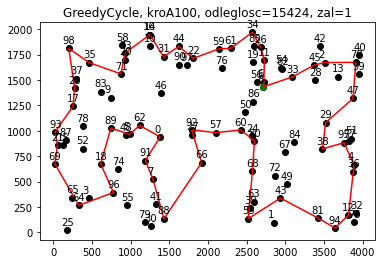

In [471]:
#Wczytywanie instancji kroa100 i krob100 (w jednym z formatów w jakim są dostępne) i obliczanie macierzy odległości.
plik="kroA100"
liczbaPowtorzen=10
sciezkaDoPliku="instances/"+plik+".tsp"
#sciezkaDoPliku="instances/kroA100.tsp"
procentMiastDoOdwiedzenia=50
zal=1
zbiorRozwiazan=[]
for i in range(liczbaPowtorzen):

    odleglosci=WczytajProblem(sciezkaDoPliku) #Zwraca macierz odleglosci miast

    #od teraz jest macierz odleglosci jako odleglosci. Wszystko leci od niej

    iloscMiast=odleglosci.shape[0]      #Określenie ilości miast 

    startMiasto=rd.randint(0,iloscMiast-1)  #Określenie miasta startowego
    #startMiasto=3                         #wybór ręczny miasta startowego
    odleglosciBackup=np.array(odleglosci)   #Kopia macierzy odleglosci- potrzebna do obliczania długości trasy na końcu
    odleglosci[:,startMiasto]=0             #Patentem na oznaczanie odwiedzonego miasta jest zerowanie odległości do tego miasta w osi Y. Przez to przy wyszukiwaniu kolejnego miasta do wstawienia zostanie ono pominięte

    sciezka=[]                              #Utworzenie tabeli zachowującej ścieżkę
    sciezka.append(startMiasto)             #Dodanie miasta startowego
    kosztLaczny=0                           #Utworzenie zmiennej na łączny koszt

    ################################################
    #Dla algorytmu greedy
    ############################################
    #Znajdowanie najbliższego sąsiada dla pierwszego miasta
    najblizszyOdleglosc=min(odleglosci[startMiasto,np.where(odleglosci[startMiasto,:]>0)])
    #Znajdowanie indeksu sąsiada z najbliższą odległością
    najblizszyNumer=ZnajdzNajblizszyPunkt(odleglosci,startMiasto)

    sciezka.append(najblizszyNumer)     #Dodanie najbliższego sąsiada
    odleglosci[:,najblizszyNumer]=0     #Zerowanie dla wstawionego sąsiada

    #Znajdowanie kolejnych
    for i in range (round((iloscMiast)*procentMiastDoOdwiedzenia/100)-2):#Tyle poszukiwan kolejnych, ile zaznaczono na poczatku w procentach
        bestDnKoszt=-10     #Koszt najlepszego punktu do wstawienia
        bestDn=-1           #Numer punktu (miasto) do wstawienia
        insertDn=-1         #indeks w który wstawić bestDn do sciezki
        wolnePunkty=[]
        for i in range (iloscMiast):
            flagJestWSciezce=False
            for miasto in sciezka:
                if miasto==i:
                    flagJestWSciezce=True
            if flagJestWSciezce==False:
                wolnePunkty.append(i)
        #print(wolnePunkty)
        rozwiazania=[]
        for miasto in wolnePunkty:
            rozwiazania.append(KosztyPunktu(miasto))
            for punkt in range (len(sciezka)):
                d1=sciezka[punkt]           #Punkt z krawędzi
                d0=sciezka[punkt-1]         #Drugi punkt (wcześniejszy) z krawędzi
                kosztD0D1=odleglosciBackup[d0,d1]   #koszt danej krawędzi
                kosztDodaniaMiasta=odleglosciBackup[d1,miasto]+odleglosciBackup[d0,miasto]-kosztD0D1                #Zmienna na koszt od punktu wcześniejszego do potencjalnego wstawianego
                #test=KosztyPunktu()
                #test.DodajRozwiazanie(d1,kosztDodaniaMiasta)
                #print(punkt)
                rozwiazania[-1].DodajRozwiazanie(punkt,kosztDodaniaMiasta)
            rozwiazania[-1].Sortuj()
        insertDn=-1    
        bestDn=-1
        bestKosztMinimalnyKrawedzi=-10
        if zal==0:
            for miasto in rozwiazania:
                minimalnaKrawedzMiasta=miasto.MinimalnaKrawedz()
                if (bestKosztMinimalnyKrawedzi==-10) or bestKosztMinimalnyKrawedzi> minimalnaKrawedzMiasta[0]:
                    bestKosztMinimalnyKrawedzi=minimalnaKrawedzMiasta[0]
                    insertDn=minimalnaKrawedzMiasta[1]
                    bestDn=miasto.MiastoIndeks()
        else:
            for miasto in rozwiazania:
                miasto.WyliczZal(zal)
                minimalnaKrawedzMiasta=miasto.MinimalnaKrawedz()
                if (bestKosztMinimalnyKrawedzi==-10) or bestKosztMinimalnyKrawedzi> miasto.PodajZal():
                    bestKosztMinimalnyKrawedzi=miasto.PodajZal()
                    insertDn=minimalnaKrawedzMiasta[1]
                    bestDn=miasto.MiastoIndeks()
        sciezka.insert(insertDn,bestDn)             #Dodanie kolejnego punktu
        odleglosci[:,sciezka[insertDn]]=0           #Zerowanie dla dodanego punktu


    #Obliczanie długości łącznej
    kosztLaczny=ObliczLacznyKoszt(odleglosciBackup,sciezka)
    #Rysowanie wykresu
    opis="GreedyCycle, "+plik+", odleglosc="+str(kosztLaczny)+", zal="+str(zal)
    zbiorRozwiazan.append(Rozwiazanie(sciezkaDoPliku,sciezka,kosztLaczny,startMiasto,opis))
rozwMin=2**32
rozwMax=0
rozwSr=0 
ilRozw=0
rozwNajlepsze=0  
for rozw in zbiorRozwiazan:
    ilRozw+=1
    if rozw.Koszt()>rozwMax:
        rozwMax=rozw.Koszt()
    if rozw.Koszt()<rozwMin:
        rozwMin=rozw.Koszt()
        rozwNajlepsze=ilRozw-1
    rozwSr+=rozw.Koszt()
rozwSr=rozwSr/ilRozw
print("Minimum= ",rozwMin," Maksimum= ",rozwMax," Srednio= ",rozwSr)
zbiorRozwiazan[rozwNajlepsze].Rysuj()

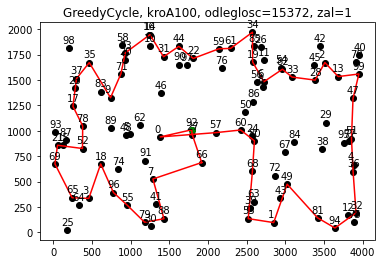

In [472]:
#Wczytywanie instancji kroa100 i krob100 (w jednym z formatów w jakim są dostępne) i obliczanie macierzy odległości.
plik="kroA100"
sciezkaDoPliku="instances/"+plik+".tsp"
#sciezkaDoPliku="instances/kroA100.tsp"
procentMiastDoOdwiedzenia=50
odleglosci=WczytajProblem(sciezkaDoPliku) #Zwraca macierz odleglosci miast
zal=1
#od teraz jest macierz odleglosci jako odleglosci. Wszystko leci od niej

iloscMiast=odleglosci.shape[0]      #Określenie ilości miast 

startMiasto=rd.randint(0,iloscMiast-1)  #Określenie miasta startowego
#startMiasto=3                         #wybór ręczny miasta startowego
odleglosciBackup=np.array(odleglosci)   #Kopia macierzy odleglosci- potrzebna do obliczania długości trasy na końcu
odleglosci[:,startMiasto]=0             #Patentem na oznaczanie odwiedzonego miasta jest zerowanie odległości do tego miasta w osi Y. Przez to przy wyszukiwaniu kolejnego miasta do wstawienia zostanie ono pominięte

sciezka=[]                              #Utworzenie tabeli zachowującej ścieżkę
sciezka.append(startMiasto)             #Dodanie miasta startowego
kosztLaczny=0                           #Utworzenie zmiennej na łączny koszt

################################################
#Dla algorytmu greedy
############################################
#Znajdowanie najbliższego sąsiada dla pierwszego miasta
najblizszyOdleglosc=min(odleglosci[startMiasto,np.where(odleglosci[startMiasto,:]>0)])
#Znajdowanie indeksu sąsiada z najbliższą odległością
najblizszyNumer=ZnajdzNajblizszyPunkt(odleglosci,startMiasto)

sciezka.append(najblizszyNumer)     #Dodanie najbliższego sąsiada
odleglosci[:,najblizszyNumer]=0     #Zerowanie dla wstawionego sąsiada

#Znajdowanie kolejnych
for i in range (round((iloscMiast)*procentMiastDoOdwiedzenia/100)-2):#Tyle poszukiwan kolejnych, ile zaznaczono na poczatku w procentach
    bestDnKoszt=-10     #Koszt najlepszego punktu do wstawienia
    bestDn=-1           #Numer punktu (miasto) do wstawienia
    insertDn=-1         #indeks w który wstawić bestDn do sciezki
    wolnePunkty=[]
    for i in range (iloscMiast):
        flagJestWSciezce=False
        for miasto in sciezka:
            if miasto==i:
                flagJestWSciezce=True
        if flagJestWSciezce==False:
            wolnePunkty.append(i)
    #print(wolnePunkty)
    rozwiazania=[]
    for miasto in wolnePunkty:
        rozwiazania.append(KosztyPunktu(miasto))
        for punkt in range (len(sciezka)):
            d1=sciezka[punkt]           #Punkt z krawędzi
            d0=sciezka[punkt-1]         #Drugi punkt (wcześniejszy) z krawędzi
            kosztD0D1=odleglosciBackup[d0,d1]   #koszt danej krawędzi
            kosztDodaniaMiasta=odleglosciBackup[d1,miasto]+odleglosciBackup[d0,miasto]-kosztD0D1                #Zmienna na koszt od punktu wcześniejszego do potencjalnego wstawianego
            #test=KosztyPunktu()
            #test.DodajRozwiazanie(d1,kosztDodaniaMiasta)
            #print(punkt)
            rozwiazania[-1].DodajRozwiazanie(punkt,kosztDodaniaMiasta)
        rozwiazania[-1].Sortuj()
    insertDn=-1    
    bestDn=-1
    bestKosztMinimalnyKrawedzi=-10
    if zal==0:
        for miasto in rozwiazania:
            minimalnaKrawedzMiasta=miasto.MinimalnaKrawedz()
            if (bestKosztMinimalnyKrawedzi==-10) or bestKosztMinimalnyKrawedzi> minimalnaKrawedzMiasta[0]:
                bestKosztMinimalnyKrawedzi=minimalnaKrawedzMiasta[0]
                insertDn=minimalnaKrawedzMiasta[1]
                bestDn=miasto.MiastoIndeks()
    else:
        for miasto in rozwiazania:
            miasto.WyliczZal(zal)
            minimalnaKrawedzMiasta=miasto.MinimalnaKrawedz()
            if (bestKosztMinimalnyKrawedzi==-10) or bestKosztMinimalnyKrawedzi> miasto.PodajZal():
                bestKosztMinimalnyKrawedzi=miasto.PodajZal()
                insertDn=minimalnaKrawedzMiasta[1]
                bestDn=miasto.MiastoIndeks()
    sciezka.insert(insertDn,bestDn)             #Dodanie kolejnego punktu
    odleglosci[:,sciezka[insertDn]]=0           #Zerowanie dla dodanego punktu


#Obliczanie długości łącznej
kosztLaczny=ObliczLacznyKoszt(odleglosciBackup,sciezka)
#Rysowanie wykresu
opis="GreedyCycle, "+plik+", odleglosc="+str(kosztLaczny)+", zal="+str(zal)
rozwiazanko=Rozwiazanie(sciezkaDoPliku,sciezka,kosztLaczny,startMiasto,opis)
rozwiazanko.Rysuj()
#RysujWykres(sciezkaDoPliku,sciezka,kosztLaczny,startMiasto,opis)
#print(sciezka)

In [473]:
#Wczytywanie instancji kroa100 i krob100 (w jednym z formatów w jakim są dostępne) i obliczanie macierzy odległości.
sciezkaDoPliku="instances/kroA100.tsp"
procentMiastDoOdwiedzenia=100
odleglosci=WczytajProblem(sciezkaDoPliku) #Zwraca macierz odleglosci miast

#od teraz jest macierz odleglosci jako odleglosci. Wszystko leci od niej

iloscMiast=odleglosci.shape[0]      #Określenie ilości miast 

startMiasto=rd.randint(0,iloscMiast-1)  #Określenie miasta startowego
#startMiasto=3                         #wybór ręczny miasta startowego
odleglosciBackup=np.array(odleglosci)   #Kopia macierzy odleglosci- potrzebna do obliczania długości trasy na końcu
odleglosci[:,startMiasto]=0             #Patentem na oznaczanie odwiedzonego miasta jest zerowanie odległości do tego miasta w osi Y. Przez to przy wyszukiwaniu kolejnego miasta do wstawienia zostanie ono pominięte

sciezka=[]                              #Utworzenie tabeli zachowującej ścieżkę
sciezka.append(startMiasto)             #Dodanie miasta startowego
kosztLaczny=0                           #Utworzenie zmiennej na łączny koszt

################################################
#Dla algorytmu greedy
############################################
#Znajdowanie najbliższego sąsiada dla pierwszego miasta
najblizszyOdleglosc=min(odleglosci[startMiasto,np.where(odleglosci[startMiasto,:]>0)])
#Znajdowanie indeksu sąsiada z najbliższą odległością
najblizszyNumer=ZnajdzNajblizszyPunkt(odleglosci,startMiasto)

sciezka.append(najblizszyNumer)     #Dodanie najbliższego sąsiada
odleglosci[:,najblizszyNumer]=0     #Zerowanie dla wstawionego sąsiada

#Znajdowanie kolejnych
for i in range (round((iloscMiast)*procentMiastDoOdwiedzenia/100)-2):#Tyle poszukiwan kolejnych, ile zaznaczono na poczatku w procentach
    bestDnKoszt=-10     #Koszt najlepszego punktu do wstawienia
    bestDn=-1           #Numer punktu (miasto) do wstawienia
    insertDn=-1         #indeks w który wstawić bestDn do sciezki
    wolnePunkty=[]
    for i in range (iloscMiast):
        flagJestWSciezce=False
        for miasto in sciezka:
            if miasto==i:
                flagJestWSciezce=True
        if flagJestWSciezce==False:
            wolnePunkty.append(i)
    #print(wolnePunkty)
    rozwiazania=[]
    for miasto in wolnePunkty:
        rozwiazania.append(KosztyPunktu(miasto))
        for punkt in range (len(sciezka)):
            d1=sciezka[punkt]           #Punkt z krawędzi
            d0=sciezka[punkt-1]         #Drugi punkt (wcześniejszy) z krawędzi
            kosztD0D1=odleglosciBackup[d0,d1]   #koszt danej krawędzi
            kosztDodaniaMiasta=odleglosciBackup[d1,miasto]+odleglosciBackup[d0,miasto]-kosztD0D1                #Zmienna na koszt od punktu wcześniejszego do potencjalnego wstawianego
            #test=KosztyPunktu()
            #test.DodajRozwiazanie(d1,kosztDodaniaMiasta)
            #print(punkt)
            rozwiazania[-1].DodajRozwiazanie(punkt,kosztDodaniaMiasta)
        rozwiazania[-1].Sortuj()
    insertDn=-1    
    bestDn=-1
    bestKosztMinimalnyKrawedzi=-10
    for miasto in rozwiazania:
        minimalnaKrawedzMiasta=miasto.MinimalnaKrawedz()
        #print(minimalnaKrawedzMiasta)
        #print(minimalnaKrawedzMiasta[1])
        if (bestKosztMinimalnyKrawedzi==-10) or bestKosztMinimalnyKrawedzi> minimalnaKrawedzMiasta[0]:
            bestKosztMinimalnyKrawedzi=minimalnaKrawedzMiasta[0]
            insertDn=minimalnaKrawedzMiasta[1]
            bestDn=miasto.MiastoIndeks()
            #bestDn=minimalnaKrawedzmiasta[1]
            #insertDn=miasto.MiastoIndeks()
        #print(minimalnaKrawedz[0])
        
    #print("Dodano: ", bestKosztMinimalnyKrawedzi,insertDn,bestDn)
        #print(minimalnaKrawedz[0])   
    #print(bestDn)
    #print(odleglosci)
    sciezka.insert(insertDn,bestDn)             #Dodanie kolejnego punktu
    odleglosci[:,sciezka[insertDn]]=0           #Zerowanie dla dodanego punktu


#Obliczanie długości łącznej
kosztLaczny=ObliczLacznyKoszt(odleglosciBackup,sciezka)
#Rysowanie wykresu
RysujWykres(sciezkaDoPliku,sciezka,kosztLaczny)
#print(sciezka)

TypeError: RysujWykres() missing 2 required positional arguments: 'startMiasto' and 'opis'

In [474]:
#Wczytywanie instancji kroa100 i krob100 (w jednym z formatów w jakim są dostępne) i obliczanie macierzy odległości.
#Bez zalu
sciezkaDoPliku="instances/kroA7.tsp"
procentMiastDoOdwiedzenia=70
odleglosci=WczytajProblem(sciezkaDoPliku) #Zwraca macierz odleglosci miast

#od teraz jest macierz odleglosci jako odleglosci. Wszystko leci od niej

iloscMiast=odleglosci.shape[0]      #Określenie ilości miast 

#startMiasto=rd.randint(0,iloscMiast-1)  #Określenie miasta startowego
startMiasto=3                       #wybór ręczny miasta startowego
odleglosciBackup=np.array(odleglosci)   #Kopia macierzy odleglosci- potrzebna do obliczania długości trasy na końcu
odleglosci[:,startMiasto]=0             #Patentem na oznaczanie odwiedzonego miasta jest zerowanie odległości do tego miasta w osi Y. Przez to przy wyszukiwaniu kolejnego miasta do wstawienia zostanie ono pominięte

sciezka=[]                              #Utworzenie tabeli zachowującej ścieżkę
sciezka.append(startMiasto)             #Dodanie miasta startowego
kosztLaczny=0                           #Utworzenie zmiennej na łączny koszt

################################################
#Dla algorytmu greedy
############################################
#Znajdowanie najbliższego sąsiada dla pierwszego miasta
najblizszyOdleglosc=min(odleglosci[startMiasto,np.where(odleglosci[startMiasto,:]>0)])
#Znajdowanie indeksu sąsiada z najbliższą odległością
najblizszyNumer=ZnajdzNajblizszyPunkt(odleglosci,startMiasto)

sciezka.append(najblizszyNumer)     #Dodanie najbliższego sąsiada
odleglosci[:,najblizszyNumer]=0     #Zerowanie dla wstawionego sąsiada

#Znajdowanie kolejnych
for i in range (round((iloscMiast)*procentMiastDoOdwiedzenia/100)-2):#Tyle poszukiwan kolejnych, ile zaznaczono na poczatku w procentach
    bestDnKoszt=-10     #Koszt najlepszego punktu do wstawienia
    bestDn=-1           #Numer punktu (miasto) do wstawienia
    insertDn=-1         #indeks w który wstawić bestDn do sciezki
    
    for punkt in range (len(sciezka)):      #dla kazdej krawedzi obliczenia dla określonego punktu
        d1=sciezka[punkt]           #Punkt z krawędzi
        d0=sciezka[punkt-1]         #Drugi punkt (wcześniejszy) z krawędzi
        kosztD0D1=odleglosciBackup[d0,d1]   #koszt danej krawędzi
        kosztD0Dn=-1                #Zmienna na koszt od punktu wcześniejszego do potencjalnego wstawianego
        kosztMinimalnyKrawedzi=-10          #Zmienna na koszt minimalny
        bestDnKrawedzi=-1                  #Zmienna na najlepszy punkt kolejny dla krawędzi
        for dn,kosztD0Dn in enumerate(odleglosci[sciezka[punkt-1],:]):      #Dla określonej krawędzi wszystkie 
            if(kosztD0Dn!=0):
                kosztD1Dn=odleglosciBackup[d1,dn]
                kosztDn=kosztD0Dn+kosztD1Dn-kosztD0D1
                if(kosztMinimalnyKrawedzi==-10) or kosztMinimalnyKrawedzi>kosztDn:
                    bestDnKrawedzi=dn
                    kosztMinimalnyKrawedzi=kosztDn
        if bestDnKoszt==-10 or kosztMinimalnyKrawedzi<bestDnKoszt:              #Sprawdzenie czy dla sprawdzona krawędź ma jakiś punkt, którego dodanie ma najmniejszy koszt
            bestDnKoszt=kosztMinimalnyKrawedzi
            bestDn=bestDnKrawedzi
            insertDn=punkt
    sciezka.insert(insertDn,bestDn)             #Dodanie kolejnego punktu
    odleglosci[:,sciezka[insertDn]]=0           #Zerowanie dla dodanego punktu


#Obliczanie długości łącznej
kosztLaczny=ObliczLacznyKoszt(odleglosciBackup,sciezka)
#Rysowanie wykresu
RysujWykres(sciezkaDoPliku,sciezka,kosztLaczny)

TypeError: RysujWykres() missing 2 required positional arguments: 'startMiasto' and 'opis'

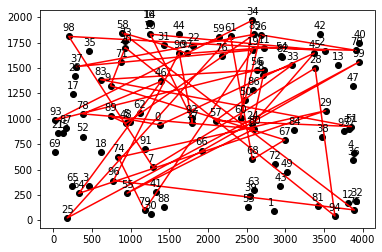

[[   0 1693 2252 ...  783 1468 2643]
 [1693    0 1708 ... 1911 3156 1831]
 [2252 1708    0 ... 1786 3315  454]
 ...
 [ 783 1911 1786 ...    0 1535 2228]
 [1468 3156 3315 ... 1535    0 3760]
 [2643 1831  454 ... 2228 3760    0]]
[61, 59, 76, 19, 85, 34, 26, 11, 56, 6, 8, 86, 50, 60, 24, 80, 57, 92, 27, 22, 97, 90, 44, 31, 10, 14, 16, 46, 0, 62, 5, 48, 91, 7, 66, 68, 72, 67, 84, 54, 82, 33, 45, 28, 2, 42, 13, 70, 40, 99]
[[   0 1693    0 ...    0 1468    0]
 [   0    0    0 ...    0 3156    0]
 [   0 1708    0 ...    0 3315    0]
 ...
 [   0 1911    0 ...    0 1535    0]
 [   0 3156    0 ...    0    0    0]
 [   0 1831    0 ...    0 3760    0]]
49010
